<a href="https://colab.research.google.com/github/MiguelAngel-ht/Repositorio-de-Estadistica-Avanzada/blob/main/Estad%C3%ADstica_No_Param%C3%A9trica_Mann_Whitney_Test%2C_ANOVA%2C_Spearman_Rank_Correlation_y_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estadística No Paramétrica: Mann-Whitney Test, ANOVA, Spearman Rank Correlation y Regresión**
---

*Por: Miguel Ángel Hernández Tapia*

# **13.6.3**

El propósito de un estudio realizado por investigadores de la Clínica Cleveland (Ohio) (A-6) era determinar si el uso de Flomax® reducía los efectos secundarios urinarios que comúnmente experimentan los pacientes después del tratamiento con braquoterapia (implante permanente de semillas radiactivas) para la próstata. cáncer. La siguiente tabla muestra las puntuaciones del índice de síntomas de la American Urological Association (AUA) para dos grupos de sujetos después de 8 semanas de tratamiento. Cuanto mayor sea el índice AUA, más grave será la obstrucción e irritación urinarias.
¿Podemos concluir, sobre la base de estos datos, que la mediana del índice de AUA en el grupo de Flomax® difiere significativamente del índice de mediana de AUA del grupo de placebo? Sea $\alpha = .05$.

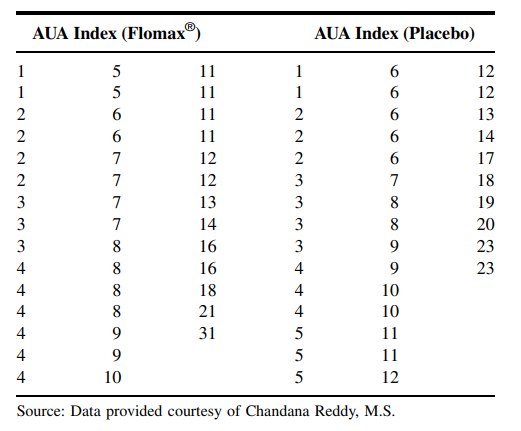

In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data = read.csv('EXR_C13_S06_03.csv',header = T)
head(data)

,AUA,GROUP
,<int>,<int>
1,1,1
2,1,1
3,2,1
4,2,1
5,2,1
6,2,1


In [ ]:
X = filter(data,GROUP == 1)[1]
Y = filter(data,GROUP == 2)[1]
typeof(X)

[1] "list"

In [ ]:
# CONVIRTIENDO LOS DATOS A NUMÉRICOS

x = c()
for(i in X)
 {
  i = as.numeric(i)
  x = c(x,i)
 }

y = c()
for(i in Y)
 {
  i = as.numeric(i)
  y = c(y,i)
 }

In [ ]:
median(y)

[1] 6.5

In [ ]:
median(x)

[1] 7

In [ ]:
length(y)

[1] 40

In [ ]:
qwilcox(0.025,40,43)

[1] 645

In [ ]:
wilcox.test(x,y,alternative = "two.sided", mu = 0, paired = F, conf.int = .95)

Warning message in wilcox.test.default(x, y, alternative = "two.sided", mu = 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x, y, alternative = "two.sided", mu = 0, :
“cannot compute exact confidence intervals with ties”



	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 826.5, p-value = 0.7631
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -2.999953  1.999956
sample estimates:
difference in location 
         -5.848799e-06 


**Conclusión:** Como el $p-value$ es $.76$ no es significativamente pequeño para concluir que las medias sean iguales y por lo tanto, son distintas.

# **13.7.3**

Para una muestra de sujetos aparentemente normales que sirvieron como controles en un experimento, se registraron las siguientes lecturas de presión arterial sistólica al comienzo del experimento:

> 162 177 151 167

> 130 154 179 146

> 147 157 141 157

> 153 157 134 143

> 141 137 151 161

¿Se puede concluir sobre la base de estos datos que la población de presiones sanguíneas de la que se extrajo la muestra no se distribuye normalmente con $μ = 150$ y $σ = 12$? Determine el valor $p$.

In [ ]:
datos = c(162, 177, 151 ,167,130, 154 ,179, 146,147, 157, 141, 157,153, 157 ,134, 143,141 ,137 ,151 ,161)

In [ ]:
ks.test(datos,'pnorm',150,12)

Warning message in ks.test(datos, "pnorm", 150, 12):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  datos
D = 0.13321, p-value = 0.8699
alternative hypothesis: two-sided


**Conclusión:** Como el p value es mayor a .20, se puede concluir que los datos no siguen una distribución normal con los valores de $\mu$ y $σ$ 

# **13.8.3**

3 Un estudio de niños pequeños realizado por Flexer et al. (A-9) publicado en Hearing Journal examina la eficacia de un campo de sonido FM al enseñar fonética a los niños. En el estudio, los niños en un aula sin entrenamiento en conciencia fonológica o fonémica (control) se compararon con una clase con conciencia fonológica y fonémica (PPA) y con una clase que utilizó entrenamiento en conciencia fonológica y fonémica y el campo sonoro FM (PPA / FM). Un total de 53 estudiantes de tres aulas preescolares separadas participaron en este estudio. A los estudiantes se les dio una medida de conciencia fonémica en preescolar y luego al final del primer semestre de kindergarten. Las puntuaciones de mejora se enumeran en la siguiente tabla según las mediciones de la prueba de segmentación fonémica de Yopp-Singer.

Pruebe una diferencia significativa entre los tres grupos. Sea $α = .05.$

In [ ]:
datas = read.csv('EXR_C13_S08_03.csv', header = T)
head(datas)

,IMP,GROUP
,<int>,<int>
1,0,1
2,-1,1
3,0,1
4,1,1
5,4,1
6,5,1


In [ ]:
kruskal.test(IMP~GROUP, data = datas)


	Kruskal-Wallis rank sum test

data:  IMP by GROUP
Kruskal-Wallis chi-squared = 18.214, df = 2, p-value = 0.0001109


**Conclusión:** Las clases son distintas entre los valores obtenidos en el estudios de sonidos, debido a que el $p-value$ es suficientemente significativo.

# **13.8.6**

Se midió la actividad de la g-glutamil transpeptidasa (GGTP) hepática en 22 pacientes sometidos a biopsia hepática percutánea. Los resultados fueron los siguientes:

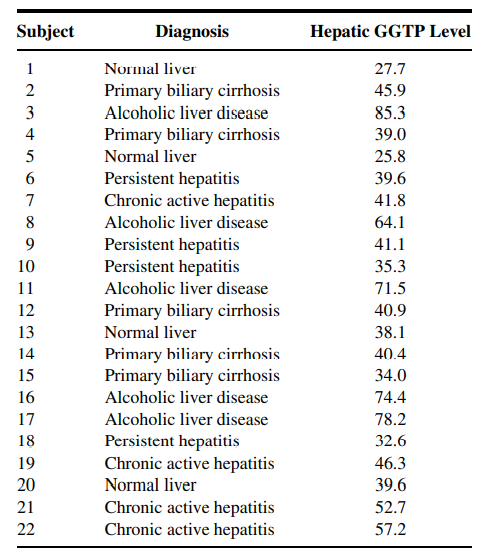

¿Podemos concluir a partir de estos datos de muestra que el nivel de GGTP de la población promedio difiere entre los cinco grupos de diagnóstico? Sea a = .05 y encuentre el valor p.

In [ ]:
dattos = read.csv('EXR_C13_S08_06.csv',header = T)
head(dattos)

,SUBJ,DIAG,LEVEL
,<int>,<chr>,<dbl>
1,1,NL,27.7
2,2,PBC,45.9
3,3,ALD,85.3
4,4,PBC,39.0
5,5,NL,25.8
6,6,PH,39.6


In [ ]:
kruskal.test(LEVEL~DIAG, data = dattos)


	Kruskal-Wallis rank sum test

data:  LEVEL by DIAG
Kruskal-Wallis chi-squared = 17.17, df = 4, p-value = 0.001792


**Conclusión:** Por el valor de $p$, concluimos que las clases son distintas de acuerdo a su nivel GGTP.

# **13.9.3**

Diez sujetos con asma inducida por el ejercicio participaron en un experimento para comparar el efecto protector de un fármaco administrado en cuatro niveles de dosis. Se utilizó solución salina como control. La variable de interés fue el cambio en el FEV1 después de la administración del fármaco o solución salina. Los resultados fueron los siguientes:

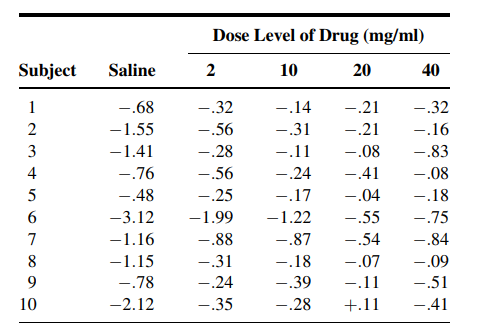


¿Se puede concluir sobre la base de estos datos que diferentes niveles de dosis tienen efectos diferentes? Sea $\alpha = .05$ y encuentre el valor $p$.

In [19]:
data = read.csv('EXR_C13_S09_03.csv', header = T)
head(data)

,SUBJ,SALINE,T2,T10,T20,T40
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.68,-0.32,-0.14,-0.21,-0.32
2,2,-1.55,-0.56,-0.31,-0.21,-0.16
3,3,-1.41,-0.28,-0.11,-0.08,-0.83
4,4,-0.76,-0.56,-0.24,-0.41,-0.08
5,5,-0.48,-0.25,-0.17,-0.04,-0.18
6,6,-3.12,-1.99,-1.22,-0.55,-0.75


In [ ]:
attach(data)

In [30]:
valoracion = c(SALINE,T2, T10, T20, T40)

In [48]:
tratamiento = factor(rep(c('sa','t2','t10','t20','t40'),each = 10))
sujeto  = factor(rep(1:10,  5 ))
dat = data.frame(valoracion,tratamiento,sujeto)

In [50]:
friedman.test(valoracion,tratamiento,sujeto)


	Friedman rank sum test

data:  valoracion, tratamiento and sujeto
Friedman chi-squared = 29.528, df = 4, p-value = 6.107e-06


**Conclusión:** Concluimos que para 4 grados de libertad el valor de tabla para $\chi ^2 _{.95} = 4.9488$ y el calculado es mayor $\chi^2 = 29.528$ por lo que se rechaza la hipótesis nula y se concluye que diferentes niveles de tratamiento se comportan de forma distitnta con un grado de significancia de $p < 0.005$

# **13.10.3**

El propósito de un estudio de Nozawa et al. (A-10) fue evaluar el resultado de la reparación quirúrgica del defecto de la pars interarticularis mediante la fijación segmentaria con alambre en adultos jóvenes con espondilólisis lumbar. Los autores citan literatura que indica que la fijación segmentaria con alambre ha tenido éxito en el tratamiento de no deportistas con espondilólisis y señalan que no existía información sobre los resultados de este tipo de cirugía en deportistas. En un estudio retrospectivo de sujetos sometidos a cirugía entre 1993 y 2000, los autores encontraron 20 sujetos que se habían sometido a la cirugía. La siguiente tabla muestra la edad (años) en el momento de la cirugía y la duración (meses) de la atención de seguimiento para estos sujetos.

¿Podemos concluir, a partir de estos datos, que en una población de sujetos similares existe una asociación entre la edad y la duración del seguimiento? Sea $\alpha = .05$.

In [51]:
datos = read.csv('EXR_C13_S10_03.csv',header = T)
head(datos)

,FOLLOWUP,AGE
,<int>,<int>
1,103,37
2,68,27
3,62,12
4,60,18
5,60,18
6,54,28


In [53]:
attach(datos)

In [56]:
cor.test(FOLLOWUP,AGE,method = 's')

Warning message in cor.test.default(FOLLOWUP, AGE, method = "s"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  FOLLOWUP and AGE
S = 1305.8, p-value = 0.9392
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01823019 


**Conclusión:** No hay correlación entre la edad y la duración del seguimiento para este experimento, debido a que la $\rho$ es muy pequeña y el $p-value$ es muy grande.

# **13.10.6**

Diecisiete pacientes con antecedentes de insuficiencia cardíaca congestiva participaron en un estudio para evaluar los efectos del ejercicio en diversas funciones corporales. Durante un período de ejercicio, se recopilaron los siguientes datos sobre el cambio porcentual en la noradrenalina plasmática (Y) y el cambio porcentual en el consumo de oxígeno (X):

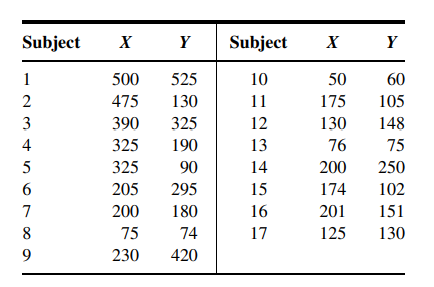

Sobre la base de estos datos, ¿se puede concluir que existe una asociación entre las dos variables?  Sea $\alpha = .05$.

In [57]:
dat = read.csv('EXR_C13_S10_06.csv',header = T)
head(dat)

,SUBJECT,X,Y
,<int>,<int>,<int>
1,1,500,525
2,2,475,130
3,3,390,325
4,4,325,190
5,5,325,90
6,6,205,295


In [58]:
attach(dat)

In [59]:
cor.test(X,Y,method =  's')

Warning message in cor.test.default(X, Y, method = "s"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  X and Y
S = 246.95, p-value = 0.00186
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6973605 


**Conclusión:** Sí hay correlación entre la concentración de noradrenalina plasmática (Y) y el cambio porcentual en el consumo de oxígeno (X) con $ p < 0.005$ grados de significancia.

# **13.11.2**

Los siguientes son los pesos corporales (gramos) y el área de superficie total (cm2) de nueve animales de laboratorio:

>Peso corporal (X): 660.2 706.0 924.0 936.0 992.1 888.9 999.4 890.3 841.2

>Superficie (Y): 781.7 888.7 1038.1 1040.0 1120.0 1071.5 1134.5 965.3 925.0

Calcule el estimador de pendiente y dos estimadores de intersección.

In [66]:
install.packages('mblm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
library(mblm)

In [73]:
X = c(660.2, 706.0, 924.0, 936.0, 992.1, 888.9, 999.4, 890.3, 841.2) 
Y = c(781.7, 888.7, 1038.1, 1040.0, 1120.0, 1071.5, 1134.5, 965.3, 925.0)
modelo = mblm(Y~X,repeated = F)
regresion = lm(Y~X)

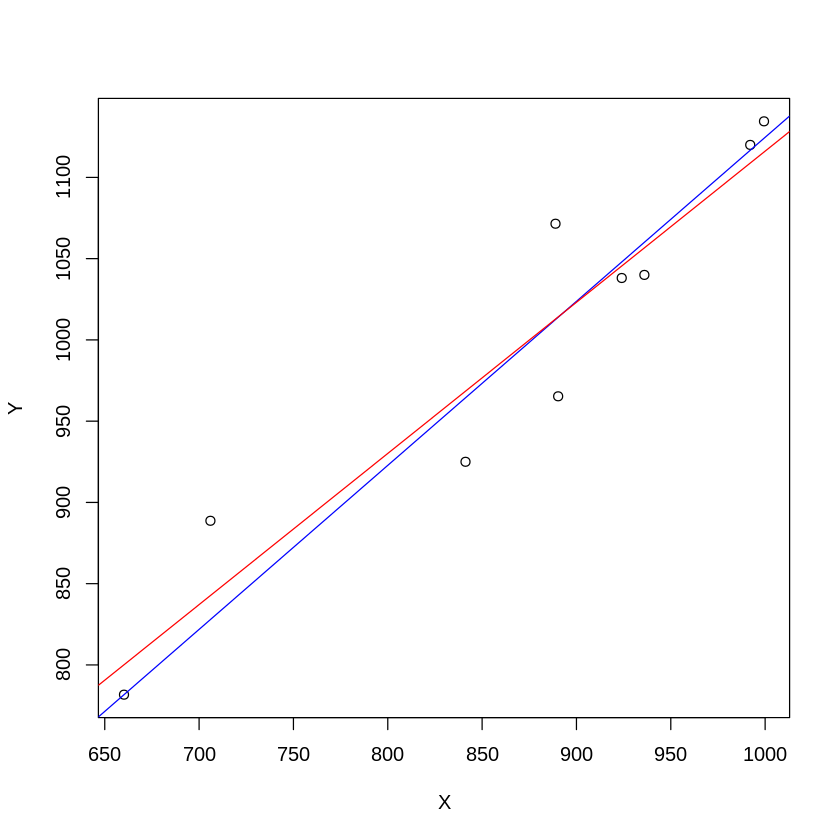

In [74]:
plot(X,Y)
abline(modelo, col = 'blue')
abline(regresion, col = 'red')

In [75]:
summary(modelo)


Call:
mblm(formula = Y ~ X, repeated = F)

Residuals:
   Min     1Q Median     3Q    Max 
-48.66 -20.08   0.00  10.42  60.77 

Coefficients:
            Estimate      MAD V value Pr(>|V|)    
(Intercept) 115.3152  29.7761      45  0.00391 ** 
X             1.0094   0.5249     608  2.3e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.9 on 7 degrees of freedom


In [76]:
summary(regresion)


Call:
lm(formula = Y ~ X)

Residuals:
   Min     1Q Median     3Q    Max 
-48.83 -18.41  -7.38  18.89  58.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 186.0223   104.1831   1.786 0.117342    
X             0.9301     0.1187   7.839 0.000104 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.61 on 7 degrees of freedom
Multiple R-squared:  0.8977,	Adjusted R-squared:  0.8831 
F-statistic: 61.44 on 1 and 7 DF,  p-value: 0.0001038


**Conclusión:** Notamos que ambas rectas se intesectan en un punto, la pendiente del análisis no paramétrico es ligeramente mayor que la paramétrica y la ordenada al origen es mayor para la parámetrica con 70.7 unidades (gramos). Con ambos análisis concluimos que sí se puede predecir la superficie conociendo el peso corporal.